# Analyse du risque d’échec, d’abandon et de réussite académique
## Impact de la santé mentale et du sommeil chez les étudiants universitaires

## 1. Contexte et objectif métier

L’objectif de ce projet est d’analyser le risque d’échec, d’abandon ou de réussite académique des étudiants universitaires à partir de facteurs liés à la santé mentale, tels que le sommeil, le stress académique et la fatigue.


## 2. Méthodologie

Deux jeux de données sont exploités de manière complémentaire :
- Données micro : analyse individuelle des étudiants
- Données macro : indicateurs agrégés à destination des décideurs


# Import des librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import de la base de données

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Student Insomnia and Educational Outcomes Dataset_version-2 (1).csv to Student Insomnia and Educational Outcomes Dataset_version-2 (1).csv


In [ ]:
!ls


 sample_data
'Student Insomnia and Educational Outcomes Dataset_version-2 (1).csv'


In [ ]:
df_students = pd.read_csv("Student Insomnia and Educational Outcomes Dataset_version-2 (1).csv")

# Vérification des colonnes

In [ ]:
df_students.columns


Index(['Timestamp', '1. What is your year of study?',
       '2. What is your gender?',
       '3. How often do you have difficulty falling asleep at night? ',
       '4. On average, how many hours of sleep do you get on a typical day?',
       '5. How often do you wake up during the night and have trouble falling back asleep?',
       '6. How would you rate the overall quality of your sleep?',
       '7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?',
       '8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?',
       '9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?',
       '10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?',
       '11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?',
       '12. How often do you con

# Nouvelle section

# Sélection des variables utiles

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sleep_hours_col = "4. On average, how many hours of sleep do you get on a typical day?"
sleep_quality_col = "6. How would you rate the overall quality of your sleep?"
stress_col = "14. How would you describe your stress levels related to academic workload?"
fatigue_col = "8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?"
concentration_col = "7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?"
performance_col = "15. How would you rate your overall academic performance (GPA or grades) in the past semester?"

df_micro = df_students[
    [
        sleep_hours_col,
        sleep_quality_col,
        stress_col,
        fatigue_col,
        concentration_col,
        performance_col
    ]
].copy()

df_micro.head()


,"4. On average, how many hours of sleep do you get on a typical day?",6. How would you rate the overall quality of your sleep?,14. How would you describe your stress levels related to academic workload?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?",7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,7-8 hours,Good,High stress,Often,Sometimes,Average
1,7-8 hours,Good,Low stress,Sometimes,Often,Good
2,7-8 hours,Good,High stress,Often,Often,Below Average
3,More than 8 hours,Poor,Extremely high stress,Often,Often,Excellent
4,7-8 hours,Very good,Low stress,Sometimes,Always,Average


# Mapping des heures de sommeil

In [ ]:
sleep_hours_mapping = {
    "Less than 5 hours": 4.0,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 8.5
}

df_micro["sleep_hours_num"] = df_micro[sleep_hours_col].map(sleep_hours_mapping)

df_micro[[sleep_hours_col, "sleep_hours_num"]].head()


,"4. On average, how many hours of sleep do you get on a typical day?",sleep_hours_num
0,7-8 hours,7.5
1,7-8 hours,7.5
2,7-8 hours,7.5
3,More than 8 hours,8.5
4,7-8 hours,7.5


Les heures de sommeil étant recueillies sous forme de classes, un recodage en valeurs numériques représentatives a été effectué afin de permettre le calcul d’indicateurs, l’analyse de corrélation et les analyses multivariées.

## Sous-dataframe de travail

In [ ]:
df_micro = df_students[[sleep_hours_col, sleep_quality_col, stress_col, fatigue_col, concentration_col, performance_col]].copy()


## Normaliser un peu (espaces) avant mapping

In [ ]:
df_micro["sleep_hours_cat"] = df_micro[sleep_hours_col].astype(str).str.strip()
df_micro["sleep_hours_num"] = df_micro["sleep_hours_cat"].map(sleep_hours_mapping)


# Nouvelle section

# Fonctions utilitaires pour graphiques et KPI

In [ ]:
def plot_hist(series, title, xlabel, bins=8):
    plt.figure()
    series.dropna().hist(bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Nombre d'étudiants")
    plt.show()

def plot_bar_percent(series, title, xlabel="Catégorie"):
    pct = series.dropna().value_counts(normalize=True) * 100
    plt.figure()
    pct.plot(kind="bar")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Pourcentage (%)")
    plt.show()
    return pct

def norm(x):
    return np.nan if pd.isna(x) else str(x).strip().lower()


# Nouvelle section

# 1.1 Analyses descriptives univariées

## Distribution des heures de sommeil + KPI (< 6h)

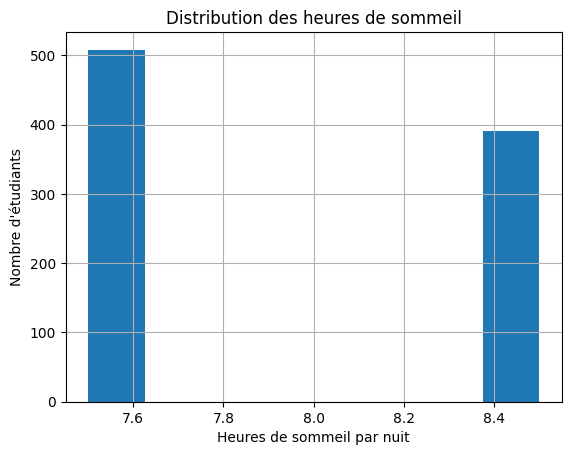

% d’étudiants dormant < 6h : 0.00%


In [ ]:
plot_hist(
    df_micro["sleep_hours_num"],
    "Distribution des heures de sommeil",
    "Heures de sommeil par nuit"
)

pct_less_6h = (df_micro["sleep_hours_num"] < 6).mean() * 100
print(f"% d’étudiants dormant < 6h : {pct_less_6h:.2f}%")


Aucun étudiant ne déclare dormir moins de 6 heures par nuit. Cependant, malgré une durée de sommeil globalement suffisante, une proportion significative d’étudiants rapporte une mauvaise qualité de sommeil, une fatigue élevée et des difficultés de concentration, suggérant que le problème ne réside pas uniquement dans la quantité de sommeil, mais également dans sa qualité.

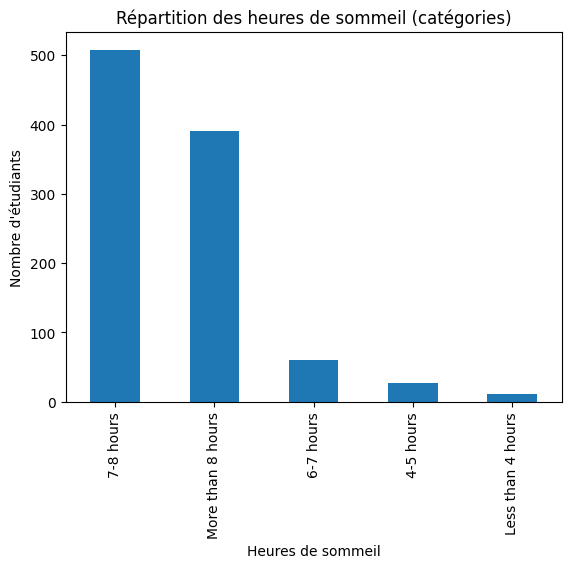

In [ ]:

# graphique montrant la répartition déclarée des durées de sommeil ( variables catégorielles), telle qu’elle a été collectée par le questionnaire, pour une observation plus lisible .

sleep_dist = df_micro["sleep_hours_cat"].value_counts()

plt.figure()
sleep_dist.plot(kind="bar")
plt.title("Répartition des heures de sommeil (catégories)")
plt.xlabel("Heures de sommeil")
plt.ylabel("Nombre d'étudiants")
plt.show()


La répartition des heures de sommeil montre que la majorité des étudiants déclarent dormir entre 7 et 8 heures par nuit, tandis qu’une autre partie déclare dormir plus de 8 heures. Aucune catégorie correspondant à un sommeil inférieur à 6 heures n’apparaît dans l’échantillon, ce qui explique le résultat nul obtenu pour l’indicateur « % d’étudiants dormant moins de 6 heures ».

## Répartition de la qualité du sommeil + KPI

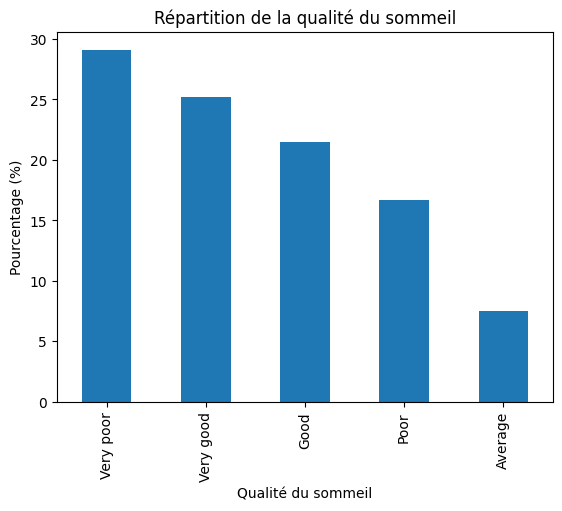

% avec mauvaise qualité de sommeil (Poor) : 16.67%


In [ ]:
sleep_quality_pct = plot_bar_percent(
    df_micro[sleep_quality_col],
    "Répartition de la qualité du sommeil",
    "Qualité du sommeil"
)

pct_bad_sleep = df_micro[sleep_quality_col].map(norm).isin({"poor"}).mean() * 100
print(f"% avec mauvaise qualité de sommeil (Poor) : {pct_bad_sleep:.2f}%")


Le graphique montre une répartition contrastée de la qualité du sommeil chez les étudiants. Une part importante d’entre eux déclare une qualité de sommeil faible à très faible, comme en témoignent les catégories Very poor et Poor, qui représentent une proportion notable de l’échantillon.

Le problème du sommeil chez les étudiants ne se limite pas à la quantité d’heures dormies, mais concerne avant tout la qualité du sommeil, qui varie fortement et impacte le bien-être et la réussite académique.

## Stress académique + KPI (stress élevé)

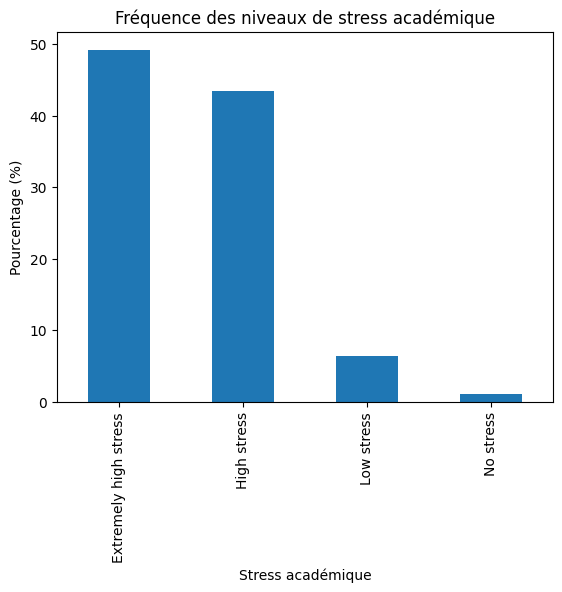

% avec stress académique élevé : 92.57%


In [ ]:
stress_pct = plot_bar_percent(
    df_micro[stress_col],
    "Fréquence des niveaux de stress académique",
    "Stress académique"
)

pct_high_stress = df_micro[stress_col].map(norm).isin(
    {"high stress", "extremely high stress"}
).mean() * 100

print(f"% avec stress académique élevé : {pct_high_stress:.2f}%")


Le graphique met en évidence une prévalence très élevée du stress académique parmi les étudiants. La majorité d’entre eux se situe dans les catégories High stress et Extremely high stress, qui représentent à elles seules une proportion largement dominante de l’échantillon.

À l’inverse, les niveaux de stress Low stress et No stress concernent une part très marginale des étudiants, ce qui indique que le stress académique est une situation quasi généralisée plutôt qu’exceptionnelle.

Valeur métier :

Le stress académique constitue un facteur de risque majeur et généralisé, susceptible d’affecter le bien-être des étudiants et de contribuer indirectement à la fatigue, aux difficultés de concentration et à la baisse de performance académique.

## Répartition de la fatigue

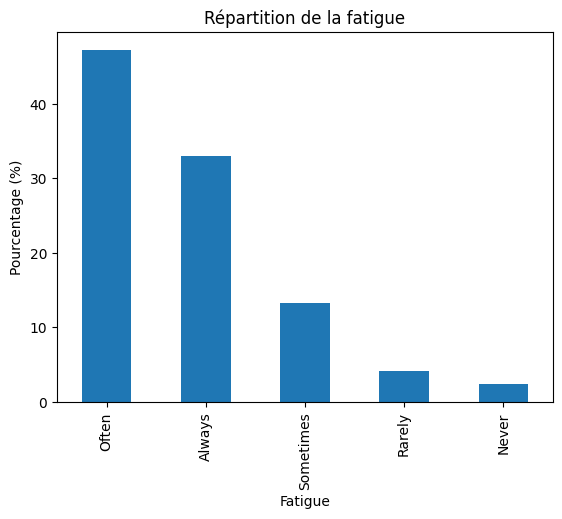

,proportion
"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?",
Often,47.188755
Always,33.032129
Sometimes,13.253012
Rarely,4.116466
Never,2.409639


In [ ]:
fatigue_pct = plot_bar_percent(
    df_micro[fatigue_col],
    "Répartition de la fatigue",
    "Fatigue"
)

fatigue_pct


Le graphique montre que la fatigue est largement répandue parmi les étudiants. Une majorité d’entre eux déclare se sentir souvent ou toujours fatiguée, ce qui indique un état de fatigue chronique plutôt qu’occasionnel.

Les catégories Rarely et Never représentent une part très faible de l’échantillon, suggérant que peu d’étudiants se sentent réellement reposés au quotidien.

Valeur métier :  

La fatigue constitue un facteur central de vulnérabilité chez les étudiants, susceptible d’affecter directement la concentration, la capacité d’apprentissage et, à terme, la performance académique.

## Répartition de la concentration

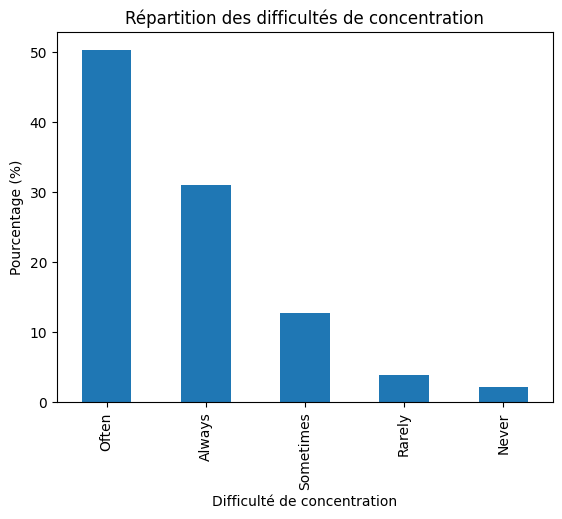

,proportion
7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,
Often,50.301205
Always,31.024096
Sometimes,12.650602
Rarely,3.815261
Never,2.208835


In [ ]:
concentration_pct = plot_bar_percent(
    df_micro[concentration_col],
    "Répartition des difficultés de concentration",
    "Difficulté de concentration"
)

concentration_pct


Le graphique met en évidence une prévalence très élevée des difficultés de concentration chez les étudiants. La majorité d’entre eux déclare rencontrer des difficultés souvent ou toujours, ce qui indique que les problèmes de concentration sont fréquents et persistants dans le contexte universitaire.

À l’inverse, les catégories Rarely et Never regroupent une part très limitée des étudiants, suggérant que peu d’entre eux parviennent à maintenir une concentration stable et durable.

Valeur métier :

Les difficultés de concentration représentent un facteur explicatif majeur de la baisse de performance académique et du risque d’échec, en limitant l’assimilation des cours et l’efficacité du travail personnel.

## Performance académique + KPI (performance faible)

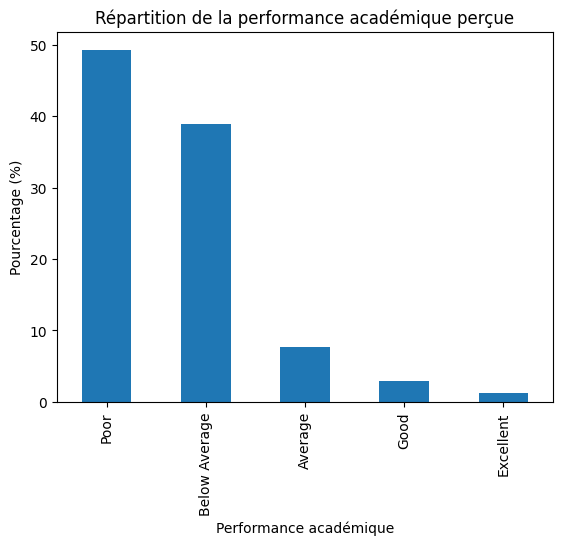

% avec performance académique faible : 38.96%


In [ ]:
performance_pct = plot_bar_percent(
    df_micro[performance_col],
    "Répartition de la performance académique perçue",
    "Performance académique"
)

pct_low_perf = df_micro[performance_col].map(norm).isin(
    {"below average"}
).mean() * 100

print(f"% avec performance académique faible : {pct_low_perf:.2f}%")


Le graphique montre que la majorité des étudiants évaluent leur performance académique comme faible. Les catégories Poor et Below Average regroupent à elles seules une part largement dominante de l’échantillon, tandis que les niveaux Good et Excellent concernent une proportion très réduite d’étudiants.

La catégorie Average reste minoritaire, ce qui indique que peu d’étudiants perçoivent leur situation académique comme satisfaisante.

Valeur métier :

La performance académique perçue apparaît globalement faible, ce qui confirme l’existence d’un problème structurel de réussite universitaire et justifie la mise en place d’actions ciblées de prévention et d’accompagnement.

## Tableau final des indicateurs clés (preuve de l’ampleur)

In [ ]:
kpi_table = pd.DataFrame({
    "Indicateur clé": [
        "Étudiants dormant < 6h",
        "Mauvaise qualité du sommeil",
        "Stress académique élevé",
        "Performance académique faible"
    ],
    "Pourcentage (%)": [
        pct_less_6h,
        pct_bad_sleep,
        pct_high_stress,
        pct_low_perf
    ]
})

kpi_table


,Indicateur clé,Pourcentage (%)
0,Étudiants dormant < 6h,0.000000
1,Mauvaise qualité du sommeil,16.666667
2,Stress académique élevé,92.570281
3,Performance académique faible,38.955823


# 1.2 Analyses bivariées (relations entre variables)

## Vérifications rapides

In [ ]:
# Vérifions que df_micro existe et contient les colonnes nécessaires
needed = ["sleep_hours_num", sleep_quality_col, stress_col, fatigue_col, concentration_col, performance_col]
missing = [c for c in needed if c not in df_micro.columns]
print("Colonnes manquantes :", missing)
df_micro[needed].head()


Colonnes manquantes : []


,sleep_hours_num,6. How would you rate the overall quality of your sleep?,14. How would you describe your stress levels related to academic workload?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?",7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,7.5,Good,High stress,Often,Sometimes,Average
1,7.5,Good,Low stress,Sometimes,Often,Good
2,7.5,Good,High stress,Often,Often,Below Average
3,8.5,Poor,Extremely high stress,Often,Often,Excellent
4,7.5,Very good,Low stress,Sometimes,Always,Average


## Ordonner les variables (pour des graphiques plus lisibles)

In [ ]:
# Ordre logique pour la performance (du plus faible au plus fort)
perf_order = ["Below Average", "Average", "Good", "Excellent"]

# Ordre logique pour la qualité du sommeil
sleep_quality_order = ["Poor", "Good", "Very good"]

# Ordre logique fréquence
freq_order = ["Never", "Rarely", "Sometimes", "Often", "Always"]

# Ordre logique stress
stress_order = [
    "No stress",
    "Low stress",
    "High stress",
    "Extremely high stress"
]

## Sommeil ↔ Performance académique

### Heures de sommeil vs performance (moyenne + barplot)

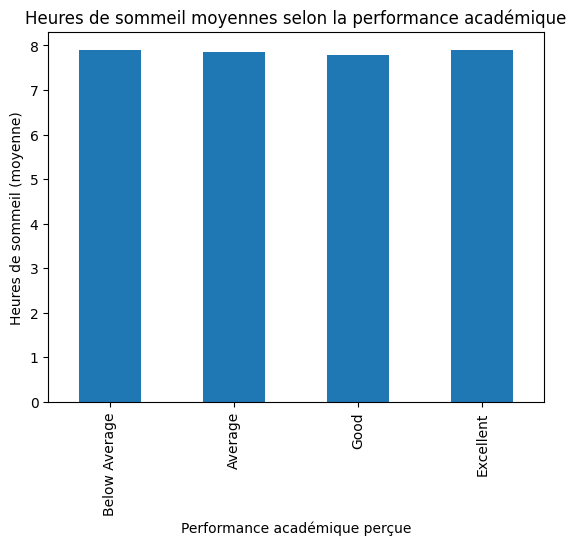

,sleep_hours_num
15. How would you rate your overall academic performance (GPA or grades) in the past semester?,
Below Average,7.905028
Average,7.844828
Good,7.794118
Excellent,7.900000


In [ ]:
tmp = df_micro.dropna(subset=["sleep_hours_num", performance_col]).copy()

# Moyenne d'heures de sommeil par niveau de performance
mean_sleep_by_perf = (
    tmp.groupby(performance_col)["sleep_hours_num"]
    .mean()
    .reindex(perf_order)
)

plt.figure()
mean_sleep_by_perf.plot(kind="bar")
plt.title("Heures de sommeil moyennes selon la performance académique")
plt.xlabel("Performance académique perçue")
plt.ylabel("Heures de sommeil (moyenne)")
plt.show()

mean_sleep_by_perf


### Heures de sommeil vs performance (boxplot)

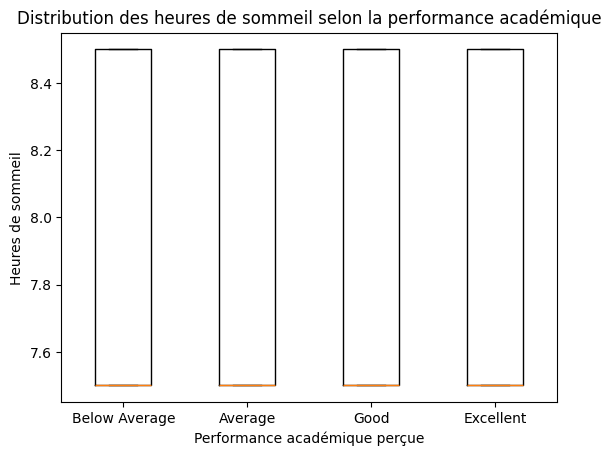

In [ ]:
tmp = df_micro.dropna(subset=["sleep_hours_num", performance_col]).copy()

# On garde seulement les catégories de performance attendues
tmp = tmp[tmp[performance_col].isin(perf_order)]

data = [tmp.loc[tmp[performance_col] == p, "sleep_hours_num"].values for p in perf_order]

plt.figure()
plt.boxplot(data, tick_labels=perf_order)
plt.title("Distribution des heures de sommeil selon la performance académique")
plt.xlabel("Performance académique perçue")
plt.ylabel("Heures de sommeil")
plt.show()


### Qualité du sommeil vs performance (table de contingence + heatmap simple)

In [ ]:
ct = pd.crosstab(df_micro[sleep_quality_col], df_micro[performance_col], normalize="index") * 100
ct = ct.reindex(index=sleep_quality_order).reindex(columns=perf_order)
ct


15. How would you rate your overall academic performance (GPA or grades) in the past semester?,Below Average,Average,Good,Excellent
6. How would you rate the overall quality of your sleep?,,,,
Poor,42.168675,10.843373,3.614458,3.012048
Good,43.925234,7.943925,4.672897,1.401869
Very good,31.075697,5.976096,0.398406,0.398406


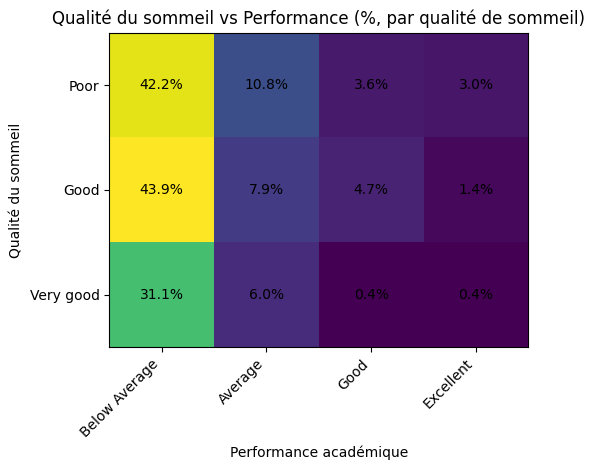

In [ ]:
# Heatmap sans seaborn (matplotlib)
plt.figure()
plt.imshow(ct.fillna(0).values)
plt.title("Qualité du sommeil vs Performance (%, par qualité de sommeil)")
plt.xlabel("Performance académique")
plt.ylabel("Qualité du sommeil")
plt.xticks(range(len(ct.columns)), ct.columns, rotation=45, ha="right")
plt.yticks(range(len(ct.index)), ct.index)

# Affichons les % sur la carte
for i in range(ct.shape[0]):
    for j in range(ct.shape[1]):
        val = ct.iloc[i, j]
        if not np.isnan(val):
            plt.text(j, i, f"{val:.1f}%", ha="center", va="center")

plt.tight_layout()
plt.show()


## Stress ↔ Fatigue / Concentration

### Stress vs fatigue (table + heatmap)

In [ ]:
ct_stress_fatigue = (
    pd.crosstab(
        df_micro[stress_col],
        df_micro[fatigue_col],
        normalize="index"
    ) * 100
)

ct_stress_fatigue = ct_stress_fatigue.reindex(index=stress_order)
ct_stress_fatigue



"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?",Always,Never,Often,Rarely,Sometimes
14. How would you describe your stress levels related to academic workload?,,,,,
No stress,0.000000,27.272727,36.363636,9.090909,27.272727
Low stress,6.349206,11.111111,30.158730,12.698413,39.682540
High stress,24.074074,1.851852,53.935185,5.555556,14.583333
Extremely high stress,45.102041,1.224490,43.673469,1.632653,8.367347


### Visualisation Stress ↔ Fatigue (heatmap simple)

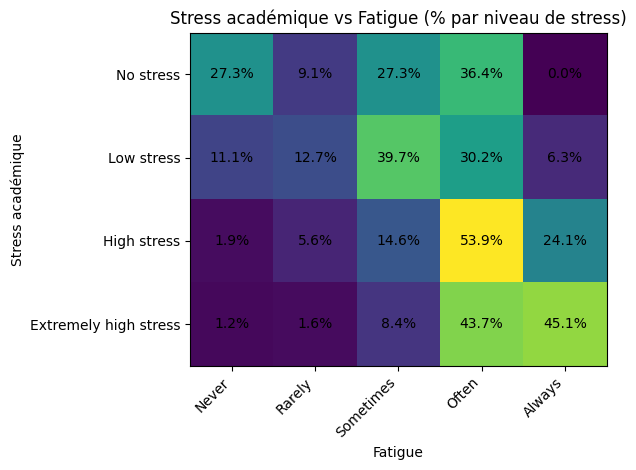

In [ ]:
freq_order = ["Never", "Rarely", "Sometimes", "Often", "Always"]
ct_stress_fatigue = ct_stress_fatigue.reindex(columns=freq_order)

plt.figure()
plt.imshow(ct_stress_fatigue.fillna(0).values)
plt.title("Stress académique vs Fatigue (% par niveau de stress)")
plt.xlabel("Fatigue")
plt.ylabel("Stress académique")
plt.xticks(range(len(freq_order)), freq_order, rotation=45, ha="right")
plt.yticks(range(len(stress_order)), stress_order)

for i in range(ct_stress_fatigue.shape[0]):
    for j in range(ct_stress_fatigue.shape[1]):
        val = ct_stress_fatigue.iloc[i, j]
        if not np.isnan(val):
            plt.text(j, i, f"{val:.1f}%", ha="center", va="center")

plt.tight_layout()
plt.show()


### Stress ↔ Concentration

In [ ]:
ct_stress_concentration = (
    pd.crosstab(
        df_micro[stress_col],
        df_micro[concentration_col],
        normalize="index"
    ) * 100
)

ct_stress_concentration = (
    ct_stress_concentration
    .reindex(index=stress_order)
    .reindex(columns=freq_order)
)

ct_stress_concentration


7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,Never,Rarely,Sometimes,Often,Always
14. How would you describe your stress levels related to academic workload?,,,,,
No stress,18.181818,0.000000,45.454545,36.363636,0.000000
Low stress,7.936508,19.047619,31.746032,28.571429,12.698413
High stress,2.314815,3.703704,14.583333,56.018519,23.379630
Extremely high stress,1.020408,2.040816,7.755102,48.367347,40.816327


### Visualisation Stress ↔ Concentration

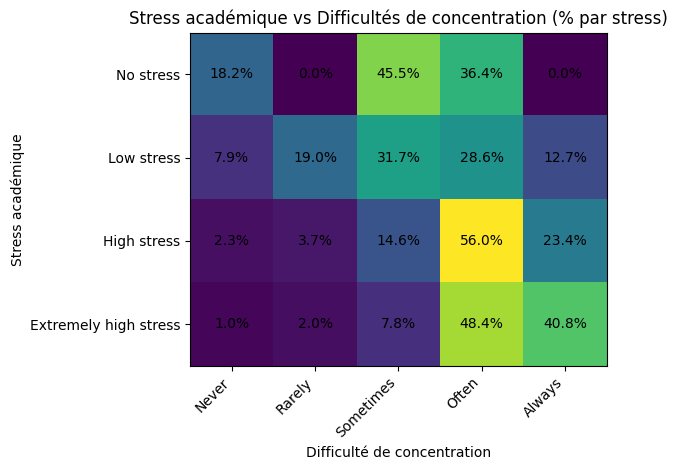

In [ ]:
plt.figure()
plt.imshow(ct_stress_concentration.fillna(0).values)
plt.title("Stress académique vs Difficultés de concentration (% par stress)")
plt.xlabel("Difficulté de concentration")
plt.ylabel("Stress académique")
plt.xticks(range(len(freq_order)), freq_order, rotation=45, ha="right")
plt.yticks(range(len(stress_order)), stress_order)

for i in range(ct_stress_concentration.shape[0]):
    for j in range(ct_stress_concentration.shape[1]):
        val = ct_stress_concentration.iloc[i, j]
        if not np.isnan(val):
            plt.text(j, i, f"{val:.1f}%", ha="center", va="center")

plt.tight_layout()
plt.show()


## Fatigue / Concentration ↔ Performance

### Ordres des catégories (pour affichage propre)

In [ ]:
# Ordre logique performance
perf_order = ["Below Average", "Average", "Good", "Excellent"]

# Ordre logique fréquence
freq_order = ["Never", "Rarely", "Sometimes", "Often", "Always"]


### Fatigue ↔ Performance (tableau en % par niveau de fatigue)

In [ ]:
ct_fatigue_perf = (
    pd.crosstab(
        df_micro[fatigue_col],
        df_micro[performance_col],
        normalize="index"
    ) * 100
)

ct_fatigue_perf = ct_fatigue_perf.reindex(index=freq_order).reindex(columns=perf_order)
ct_fatigue_perf


15. How would you rate your overall academic performance (GPA or grades) in the past semester?,Below Average,Average,Good,Excellent
"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?",,,,
Never,20.833333,20.833333,25.000000,12.500000
Rarely,26.829268,26.829268,17.073171,9.756098
Sometimes,41.666667,13.636364,8.333333,0.757576
Often,44.468085,6.595745,0.638298,0.851064
Always,32.826748,3.343465,0.607903,0.000000


### Fatigue ↔ Performance (heatmap)

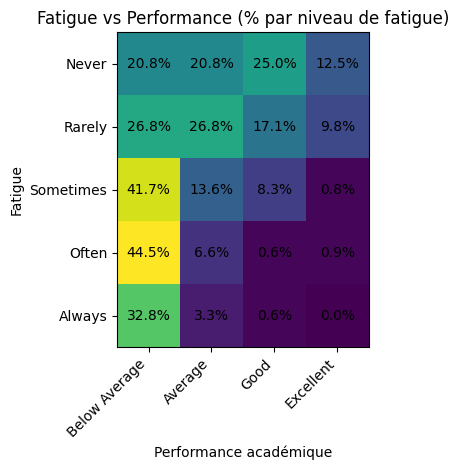

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(ct_fatigue_perf.fillna(0).values)
plt.title("Fatigue vs Performance (% par niveau de fatigue)")
plt.xlabel("Performance académique")
plt.ylabel("Fatigue")
plt.xticks(range(len(perf_order)), perf_order, rotation=45, ha="right")
plt.yticks(range(len(freq_order)), freq_order)

for i in range(ct_fatigue_perf.shape[0]):
    for j in range(ct_fatigue_perf.shape[1]):
        val = ct_fatigue_perf.iloc[i, j]
        if not np.isnan(val):
            plt.text(j, i, f"{val:.1f}%", ha="center", va="center")

plt.tight_layout()
plt.show()


### KPI métier : “Fatigue élevée → performance faible”
Ici, on définit fatigue élevée = Often ou Always
et performance faible = Below Average

In [ ]:
def norm(x):
    return np.nan if pd.isna(x) else str(x).strip().lower()

high_fatigue = df_micro[fatigue_col].map(norm).isin(["often", "always"])
low_perf = df_micro[performance_col].map(norm).isin(["below average"])

pct_low_perf_given_high_fatigue = (low_perf[high_fatigue].mean() * 100) if high_fatigue.sum() > 0 else np.nan
pct_low_perf_overall = low_perf.mean() * 100

print(f"% performance faible (Below Average) global : {pct_low_perf_overall:.2f}%")
print(f"% performance faible chez fatigue élevée (Often/Always) : {pct_low_perf_given_high_fatigue:.2f}%")


% performance faible (Below Average) global : 38.96%
% performance faible chez fatigue élevée (Often/Always) : 39.67%


### Concentration ↔ Performance (tableau en %)
Dans notre dataset, concentration_col = difficulté à se concentrer due au manque de sommeil.
Donc “faible concentration” = difficultés fréquentes = Often/Always.

In [ ]:
ct_conc_perf = (
    pd.crosstab(
        df_micro[concentration_col],
        df_micro[performance_col],
        normalize="index"
    ) * 100
)

ct_conc_perf = ct_conc_perf.reindex(index=freq_order).reindex(columns=perf_order)
ct_conc_perf


15. How would you rate your overall academic performance (GPA or grades) in the past semester?,Below Average,Average,Good,Excellent
7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,,,,
Never,22.727273,40.909091,18.181818,13.636364
Rarely,31.578947,15.789474,13.157895,5.263158
Sometimes,41.269841,12.698413,9.523810,1.587302
Often,42.714571,7.385230,0.998004,0.998004
Always,33.980583,2.588997,0.970874,0.000000


### Concentration ↔ Performance (heatmap)

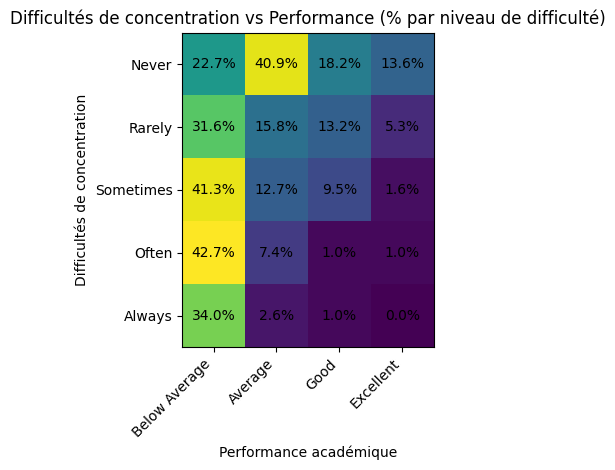

In [ ]:
plt.figure()
plt.imshow(ct_conc_perf.fillna(0).values)
plt.title("Difficultés de concentration vs Performance (% par niveau de difficulté)")
plt.xlabel("Performance académique")
plt.ylabel("Difficultés de concentration")
plt.xticks(range(len(perf_order)), perf_order, rotation=45, ha="right")
plt.yticks(range(len(freq_order)), freq_order)

for i in range(ct_conc_perf.shape[0]):
    for j in range(ct_conc_perf.shape[1]):
        val = ct_conc_perf.iloc[i, j]
        if not np.isnan(val):
            plt.text(j, i, f"{val:.1f}%", ha="center", va="center")

plt.tight_layout()
plt.show()


### KPI métier : “Faible concentration → risque d’échec”

In [ ]:
high_conc_diff = df_micro[concentration_col].map(norm).isin(["often", "always"])

pct_low_perf_given_high_conc = (low_perf[high_conc_diff].mean() * 100) if high_conc_diff.sum() > 0 else np.nan

print(f"% performance faible chez difficultés de concentration élevées (Often/Always) : {pct_low_perf_given_high_conc:.2f}%")


% performance faible chez difficultés de concentration élevées (Often/Always) : 39.38%


### Tableau de synthèse (valeur métier)

In [ ]:
summary_c = pd.DataFrame({
    "Relation": [
        "Fatigue élevée (Often/Always) → Performance faible (Below Average)",
        "Difficultés de concentration élevées (Often/Always) → Performance faible (Below Average)"
    ],
    "Pourcentage performance faible (%)": [
        pct_low_perf_given_high_fatigue,
        pct_low_perf_given_high_conc
    ]
})

summary_c


,Relation,Pourcentage performance faible (%)
0,Fatigue élevée (Often/Always) → Performance fa...,39.674593
1,Difficultés de concentration élevées (Often/Al...,39.382716


# 1.3 Analyses multivariées exploratoires
Objectif : identifier les variables les plus influentes et mettre en évidence des profils d’étudiants

## Sélection des variables pour l’analyse multivariée

In [ ]:
# Variables utilisées pour l'analyse multivariée
vars_multi = [
    "sleep_hours_num",        # sommeil (numérique)
    stress_col,               # stress académique
    fatigue_col,              # fatigue
    concentration_col,        # difficulté de concentration
    performance_col           # performance académique
]

df_multi = df_micro[vars_multi].copy()
df_multi.head()


,sleep_hours_num,14. How would you describe your stress levels related to academic workload?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?",7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,7.5,High stress,Often,Sometimes,Average
1,7.5,Low stress,Sometimes,Often,Good
2,7.5,High stress,Often,Often,Below Average
3,8.5,Extremely high stress,Often,Often,Excellent
4,7.5,Low stress,Sometimes,Always,Average


## Encodage ordinal des variables catégorielles

Nécessaire pour :

la matrice de corrélation

l’ACP

In [ ]:
# Dictionnaires d'encodage ordinal
stress_map = {
    "No stress": 0,
    "Low stress": 1,
    "High stress": 2,
    "Extremely high stress": 3
}

freq_map = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Often": 3,
    "Always": 4
}

performance_map = {
    "Below Average": 0,
    "Average": 1,
    "Good": 2,
    "Excellent": 3
}

# Application des mappings
df_multi["stress_num"] = df_multi[stress_col].map(stress_map)
df_multi["fatigue_num"] = df_multi[fatigue_col].map(freq_map)
df_multi["concentration_num"] = df_multi[concentration_col].map(freq_map)
df_multi["performance_num"] = df_multi[performance_col].map(performance_map)

# Conserver uniquement les variables numériques finales
df_multi_num = df_multi[
    [
        "sleep_hours_num",
        "stress_num",
        "fatigue_num",
        "concentration_num",
        "performance_num"
    ]
]

df_multi_num.head()


,sleep_hours_num,stress_num,fatigue_num,concentration_num,performance_num
0,7.5,2,3,2,1.0
1,7.5,1,2,3,2.0
2,7.5,2,3,3,0.0
3,8.5,3,3,3,3.0
4,7.5,1,2,4,1.0


## Matrice de corrélation

### Calcul de la matrice de corrélation

In [ ]:
corr_matrix = df_multi_num.corr()
corr_matrix


,sleep_hours_num,stress_num,fatigue_num,concentration_num,performance_num
sleep_hours_num,1.000000,0.146161,0.117492,0.104814,-0.048925
stress_num,0.146161,1.000000,0.356155,0.315037,-0.366629
fatigue_num,0.117492,0.356155,1.000000,0.561494,-0.435193
concentration_num,0.104814,0.315037,0.561494,1.000000,-0.375325
performance_num,-0.048925,-0.366629,-0.435193,-0.375325,1.000000


### Visualisation de la matrice de corrélation

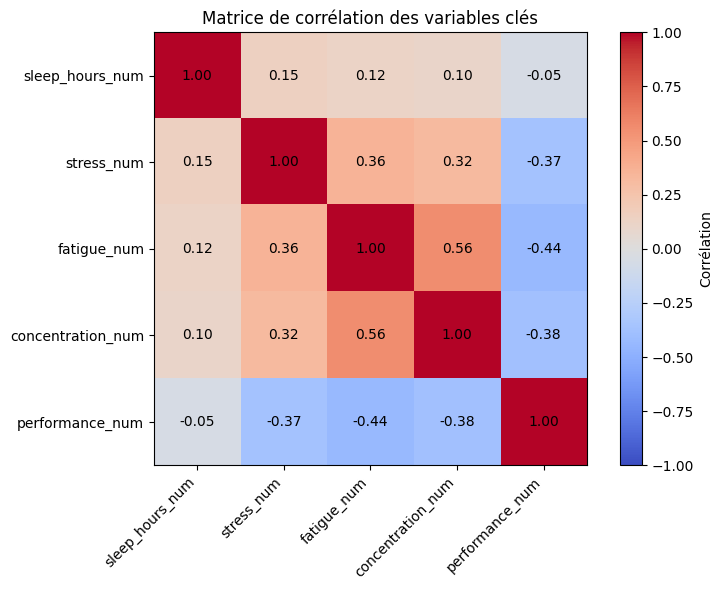

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Corrélation")

labels = corr_matrix.columns
plt.xticks(range(len(labels)), labels, rotation=45, ha="right")
plt.yticks(range(len(labels)), labels)

# Affichage des valeurs
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center")

plt.title("Matrice de corrélation des variables clés")
plt.tight_layout()
plt.show()


## ACP — Analyse en Composantes Principales

### Standardisation des données

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df_multi_num.dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Calcul de l’ACP

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


### Variance expliquée (choix du nombre d’axes)

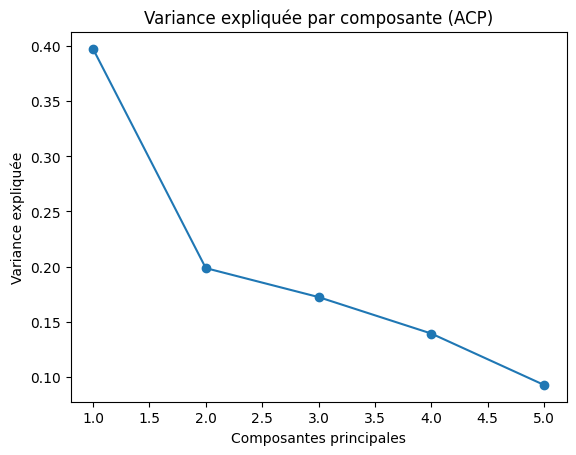

array([0.3975139 , 0.19854669, 0.17225966, 0.13916744, 0.0925123 ])

In [ ]:
explained_var = pca.explained_variance_ratio_

plt.figure()
plt.plot(range(1, len(explained_var) + 1), explained_var, marker="o")
plt.xlabel("Composantes principales")
plt.ylabel("Variance expliquée")
plt.title("Variance expliquée par composante (ACP)")
plt.show()

explained_var


NB :
en général :

PC1 + PC2 expliquent une part importante de la variance

### Projection des individus (PC1 vs PC2)

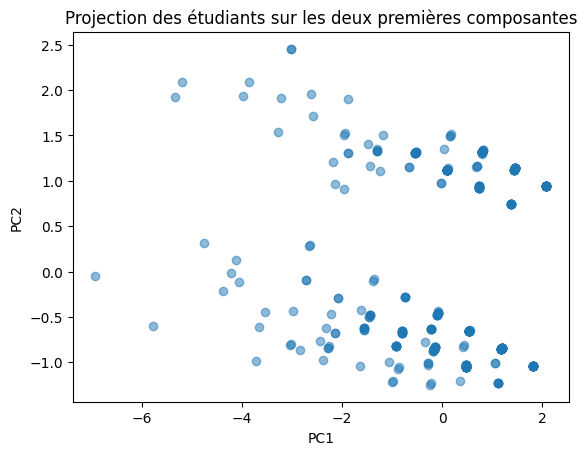

In [ ]:
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection des étudiants sur les deux premières composantes")
plt.show()


### Contribution des variables (loadings)

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=df_multi_num.columns,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

loadings.iloc[:, :2]


,PC1,PC2
sleep_hours_num,0.127818,0.965788
stress_num,0.452457,0.125633
fatigue_num,0.561651,-0.155923
concentration_num,0.520907,-0.163948
performance_num,-0.438349,0.016682


# Nouvelle section

# Analyses MACRO (institution)

Les analyses macro-institutionnelles reposent sur des variables quantitatives agrégées, permettant une vision globale et synthétique de la situation des étudiants. Elles complètent les analyses micro en fournissant des indicateurs directement exploitables pour le pilotage stratégique.

## Import des librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import de la base de données

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving df_tableau.csv to df_tableau.csv


In [ ]:
df_tableau = pd.read_csv("df_tableau.csv")

In [ ]:
df_tableau = pd.read_csv("df_tableau.csv", sep=";")
print("Dimensions :", df_tableau.shape)
df_tableau.head()

Dimensions : (1996, 6)


,Gender,Sleep_Duration,Physical_Activity,Academic_Performance,Stress_Level_re,WellBeing_Score
0,Male,7.5,5.0,3,3,5.3
1,Male,7.5,7.0,3,7,7.9
2,Male,8.0,5.0,3,1,4.7
3,Female,7.5,5.0,3,3,5.3
4,Male,8.0,5.0,3,3,5.7


In [ ]:
df_tableau.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                1996 non-null   object 
 1   Sleep_Duration        1996 non-null   float64
 2   Physical_Activity     1996 non-null   float64
 3   Academic_Performance  1996 non-null   int64  
 4   Stress_Level_re       1996 non-null   int64  
 5   WellBeing_Score       1996 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 93.7+ KB


## 2.1 Indicateurs agrégés (vision globale)

### Définition des seuils métier (institution)
Ces seuils sont simples, lisibles et défendables pour un décideur.

In [ ]:
# Seuils institutionnels
BAD_SLEEP_THRESHOLD = 6          # < 6 heures
HIGH_STRESS_THRESHOLD = 4        # stress élevé
LOW_PERFORMANCE_THRESHOLD = 2    # performance faible


### Création des indicateurs binaires stratégiques

In [ ]:
df_tableau["bad_sleep"] = df_tableau["Sleep_Duration"] < BAD_SLEEP_THRESHOLD
df_tableau["high_stress"] = df_tableau["Stress_Level_re"] >= HIGH_STRESS_THRESHOLD
df_tableau["low_performance"] = df_tableau["Academic_Performance"] <= LOW_PERFORMANCE_THRESHOLD

# Étudiant à risque (vision institutionnelle)
df_tableau["at_risk"] = (
    df_tableau["bad_sleep"] &
    df_tableau["high_stress"] &
    df_tableau["low_performance"]
)


### KPI institutionnels globaux

In [ ]:
kpi_macro = pd.DataFrame({
    "Indicateur institutionnel": [
        "% étudiants à risque",
        "% stress académique élevé",
        "% mauvais sommeil (< 6h)",
        "% performance académique faible"
    ],
    "Valeur (%)": [
        df_tableau["at_risk"].mean() * 100,
        df_tableau["high_stress"].mean() * 100,
        df_tableau["bad_sleep"].mean() * 100,
        df_tableau["low_performance"].mean() * 100
    ]
})

kpi_macro


,Indicateur institutionnel,Valeur (%)
0,% étudiants à risque,5.210421
1,% stress académique élevé,44.739479
2,% mauvais sommeil (< 6h),21.743487
3,% performance académique faible,58.967936


## 2.2 Comparaison entre groupes (allocation des ressources)

### Comparaison par sexe

In [ ]:
gender_comparison = (
    df_tableau
    .groupby("Gender")[["at_risk", "high_stress", "bad_sleep", "low_performance"]]
    .mean() * 100
)

gender_comparison


,at_risk,high_stress,bad_sleep,low_performance
Gender,,,,
Female,7.179487,54.487179,27.692308,50.256410
Male,3.773585,37.135506,17.324185,65.866209
Other,8.000000,70.000000,32.000000,34.000000


### Visualisation : étudiants à risque par sexe

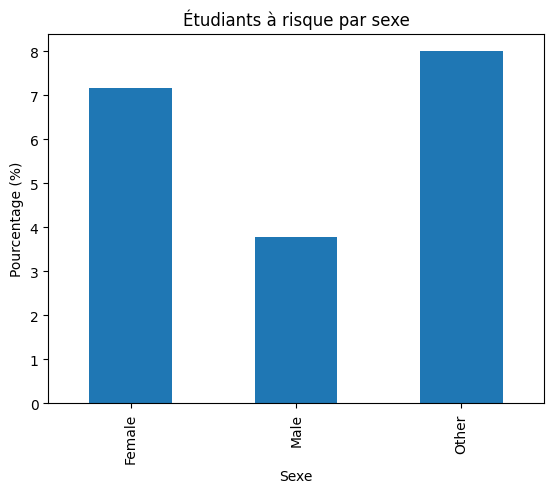

In [ ]:
import matplotlib.pyplot as plt

gender_comparison["at_risk"].plot(kind="bar")
plt.title("Étudiants à risque par sexe")
plt.ylabel("Pourcentage (%)")
plt.xlabel("Sexe")
plt.show()


### Comparaison par niveau de performance académique

In [ ]:
performance_comparison = (
    df_tableau
    .groupby("Academic_Performance")[["high_stress", "bad_sleep"]]
    .mean() * 100
)

performance_comparison


,high_stress,bad_sleep
Academic_Performance,,
1,34.347275,16.223067
2,4.123711,2.061856
3,71.157895,34.315789
5,79.216867,39.759036
7,41.666667,25.000000


### Comparaison par niveau de stress

In [ ]:
stress_comparison = (
    df_tableau
    .groupby("Stress_Level_re")[["bad_sleep", "low_performance"]]
    .mean() * 100
)

stress_comparison


,bad_sleep,low_performance
Stress_Level_re,,
1,2.244898,94.897959
3,12.887439,69.331158
5,42.147117,32.007952
7,33.846154,32.307692


## 2.3 Indicateur de bien-être institutionnel

### Bien-être moyen global

In [ ]:
df_tableau["WellBeing_Score"].describe()


,WellBeing_Score
count,1996.000000
mean,5.680471
std,1.339867
min,1.000000
25%,4.900000
50%,5.800000
75%,6.300000
max,9.750000


### Bien-être par sexe

In [ ]:
wellbeing_by_gender = df_tableau.groupby("Gender")["WellBeing_Score"].mean()
wellbeing_by_gender


,WellBeing_Score
Gender,
Female,5.589795
Male,5.744931
Other,5.591800


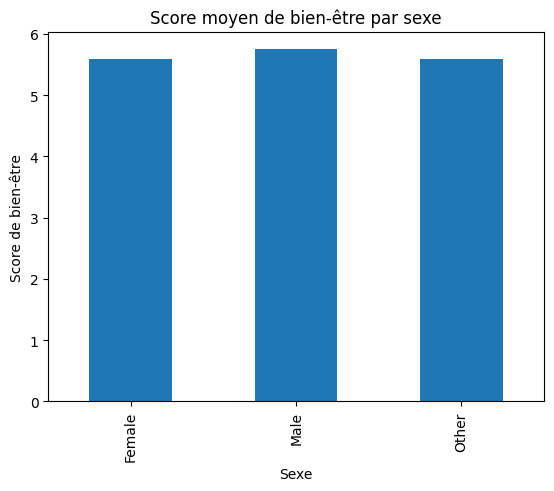

In [ ]:
wellbeing_by_gender.plot(kind="bar")
plt.title("Score moyen de bien-être par sexe")
plt.ylabel("Score de bien-être")
plt.xlabel("Sexe")
plt.show()


L’analyse macro-institutionnelle met en évidence une proportion significative d’étudiants présentant un stress académique élevé et un déficit de sommeil. La segmentation par sexe et par niveau de performance révèle des disparités importantes, permettant d’orienter l’allocation des ressources vers les groupes les plus à risque. Ces indicateurs constituent des outils d’aide à la décision pour le pilotage stratégique des politiques de bien-être et de réussite académique.